# Rooftop Solar Potential Optimization for Sustainable Energy in Nairobi

## Business Understanding

The project addresses a real-world problem faced by Nairobi residents and businesses due to frequent unprojected power outages from the Kenya Power Lighting Company (KPLC). This problem creates a demand for alternative energy sources, with solar power being a viable option. However, there is a lack of a systematic approach to harness the solar potential of individual buildings in Nairobi.


## Problem Statement

There is a lack of a systematic approach for harnessing the solar potential of individual buildings in Nairobi. This is exacerbated by multiple unprojected power outages from KPLC, leading to increased interest in alternative energy sources. The primary issues include an absence of precise insights into suitable areas for solar installations and the lack of leveraging a vector dataset containing building footprints in Nairobi.

## Objectives

1. **Rooftop Solar Potential Prediction:**
  - Utilize machine learning techniques to predict suitable rooftop areas, installable capacity, and estimated yearly energy potential for each building unit.
  - Incorporate features such as building type, estimated tilt, and building height in the predictive models.


2. **Optimization Strategies:**
   - Implement algorithms to identify the most efficient rooftop solar installations.
   - Develop strategies for maximizing solar potential while respecting building characteristics.
   - Conduct a basic cost-benefit analysis considering unit installation prices to determine the economic viability of rooftop solar installations for different building types.

3. **User-Friendly Interface:**
   - Develop a user-friendly interface for stakeholders to interact with the system.
   - Enable users to input building characteristics and receive real-time recommendations for optimal rooftop solar installations.

### Stakeholders

- **Property Owners and Managers:**
  - Seek insights into the solar potential of their buildings.
  - Need guidance on optimizing rooftop solar installations for sustainable energy planning and cost-effective solar projects.

- **Solar Installation Companies:**
  - Interested in identifying and prioritizing buildings with high solar potential for targeted marketing.
  - Utilizing the system to streamline sales efforts and optimize project planning.

- **Energy Regulatory Authorities:**
  - Aim to promote sustainable energy practices in the city.
  - Can leverage insights for policy formulation and incentive programs to encourage rooftop solar adoption.


## Limitations of the Study

- **Geographical Specificity:**
  - The system's effectiveness may be limited to Nairobi and may not be directly applicable to other regions with different geographic characteristics.
  
- **Data Dependency:**
  - The accuracy of predictions relies on the availability and accuracy of building footprint data and other relevant datasets.

- **Regulatory Variability:**
  - Different regions may have varying regulations affecting solar installations, which may not be fully considered in the system.

- **Assumed Data Quality:**
  - Assumptions about the quality of input data, including building characteristics and geographical information, may impact the accuracy of predictions.

## Success Metrics

- **Prediction Accuracy:**
  - Root Mean Squared Error (RMSE) and the Mean Squared Error (MSE) should be as low as possible

- **User Engagement:**
  - Evaluate user interaction with the system's interface, ensuring it meets the needs of stakeholders.

- **Cost-Benefit Analysis Insights:**
  - Assess the effectiveness of the system in providing valuable insights for economic decision-making in rooftop solar installations.




In [1]:
#necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Data Understanding

In [2]:
#load and read the data
data  = pd.read_csv("./nairobi_rooftop_solar_potential.csv")
data

C:\Users\User-ADMIN\AppData\Local\Temp\ipykernel_17248\894858488.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("./nairobi_rooftop_solar_potential.csv")


,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Comment
0,87100c54-0648-4e73-97f0-3a346c068231,Nairobi,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00,NaN,NaN
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,Nairobi,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98,NaN,NaN
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,Nairobi,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72,NaN,NaN
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,Nairobi,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60,NaN,NaN
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,Nairobi,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
272746,05f945d2-946f-4079-9108-2b0e23328bbe,Nairobi,36.78,0.00,0.00,0.00,single family residential,11.97,2.55,NaN,NaN,NaN
272747,b66554f5-173c-46d0-80c0-19b5e3ef04ab,Nairobi,181.87,109.44,21.23,31274.44,single family residential,18.37,3.04,1473.00,NaN,NaN
272748,abb75046-2851-4c62-a123-7d052a098c7b,Nairobi,164.34,94.38,18.31,27153.65,single family residential,9.59,4.59,1483.00,NaN,NaN
272749,d5238d1b-b7f1-47ed-bda8-7d815cee01d4,Nairobi,173.43,99.64,19.33,27911.63,single family residential,16.14,4.92,1444.00,NaN,NaN


## Data Description

The provided dataset contains information about building structures and their suitability for solar panel installation. Below is a detailed description of each column in the dataset, including unit information:


1. **uuid:**
   - *Type:* Unique identifier
   - *Description:* Unique ID assigned to each building structure polygon in the dataset.

2. **city:**
   - *Type:* Categorical
   - *Description:* Indicates the study area or city where the building is located.

3. **Surface_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Represents the surface area of the building, providing spatial information for solar potential assessment.

4. **Potential_installable_area:**
   - *Type:* Numeric (in square meters - m2)
   - *Description:* Indicates the potential rooftop area suitable for solar panel installation, contributing to the overall solar capacity.

5. **Peak_installable_capacity:**
   - *Type:* Numeric (in kilowatt peak - kWp)
   - *Description:* Represents the estimated peak installable capacity based on the suitable rooftop area. This is a crucial factor in determining the potential power generation.

6. **Energy_potential_per_year:**
    - *Type:* Numeric (in kilowatt-hours - kWh)
   - *Description:* Provides an estimate of the yearly energy potential of the rooftop

7. **Assumed_building_type:**
   - *Type:* Categorical
   - *Description:* Describes the use type of the building (e.g., single family residential, commercial ).

8. **Estimated_tilt:**
   - *Type:* Numeric
   - *Description:* Represents the estimated tilt of the rooftop, a significant factor influencing the efficiency of solar panels in capturing sunlight.

9. **Estimated_building_height:**
   - *Type:* Numeric
   - *Description:* Provides an estimate of the building height, offering additional information about the structure that may impact solar potential.

10. **Estimated_capacity_factor:**
   - *Type:* Numeric
   - *Description:* The estimated capacity factor is a measure of the efficiency of a solar installation, considering various factors such as available space, structural integrity, shading, and local regulations. It represents the ratio of the actual electrical output over a specific period to the maximum possible output if the system operated at full capacity. A higher capacity factor indicates a more efficient and reliable solar installation.


### Unit Information

- *suitable_area:* Square meters (m2)
- *installable_capacity:* Kilowatt peak (kWp)
- *potential:* Kilowatt-hours (kWh)

**Note:**
- The dataset is based on GeoEye 1 imagery acquired in 2020.
- This information allows for the analysis of rooftop solar potential, installable capacity, and estimated yearly power potential for each building in the study area.


## Data Cleaning


In [3]:
#removing the irrelevant columns 
data.drop(columns=["Comment", "Unit_installation_price","City"],inplace=True)

data.head()

,uuid,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
0,87100c54-0648-4e73-97f0-3a346c068231,204.53,77.27,14.99,21720.76,single family residential,14.11,9.09,1449.00
1,b79fedd1-7c84-4b3f-8fd4-941f3ee17b02,1113.35,676.13,131.17,182191.10,single family residential,21.81,5.57,1388.98
2,50ece267-f41a-4bb7-8874-3bf61a9d4aec,577.24,412.30,79.99,115637.95,single family residential,16.34,5.78,1445.72
3,df402f1c-5120-4a2f-bb8f-c72c89666c6f,28.58,14.17,2.75,3723.02,single family residential,23.71,4.04,1354.60
4,c4d03ac6-80ed-4aa5-95c3-a730c1bf8e68,19.03,6.19,1.20,1655.39,single family residential,22.91,5.31,1378.00


In [4]:
def display_data_understanding(dataframe):
    """
    Displays basic information about the provided DataFrame.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to analyze.
    """
    # Basic information about the DataFrame
    print("Basic Information:")
    print(dataframe.info())

    # Descriptive statistics for numeric columns
    print("\nDescriptive Statistics for Numeric Columns:")
    print(dataframe.describe())

    # Shape of the DataFrame
    print("\nShape of the DataFrame:")
    print(dataframe.shape)

    # Missing values in each column
    print("\nMissing Values:")
    print(dataframe.isnull().sum())


# Call the function with your dataset
display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272751 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272751 non-null  object 
 1   Surface_area                272751 non-null  float64
 2   Potential_installable_area  272751 non-null  float64
 3   Peak_installable_capacity   272751 non-null  float64
 4   Energy_potential_per_year   272751 non-null  float64
 5   Assumed_building_type       272751 non-null  object 
 6   Estimated_tilt              272751 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   269249 non-null  float64
dtypes: float64(7), object(2)
memory usage: 18.7+ MB
None

Descriptive Statistics for Numeric Columns:
        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272751.000000               272751.000000   

### Missing Values:
- The columns 'Estimated_building_height' and 'Estimated_capacity_factor' have missing values.
  
#### Estimated_building_height:
- There are 30 missing values in the 'Estimated_building_height' column. These missing values need to be addressed, as this information is crucial for assessing the physical characteristics of buildings.

#### Estimated_capacity_factor:
- The 'Estimated_capacity_factor' column has 3,502 missing values. These missing entries may impact the accuracy of the capacity factor calculations, and imputation or other strategies may be considered to handle these missing values.

Inorder to decide whether to impute the values in the `Estimated_capacity_factor` we check the distribution of this data using a histogram inorder to decide whether to use the mean or median

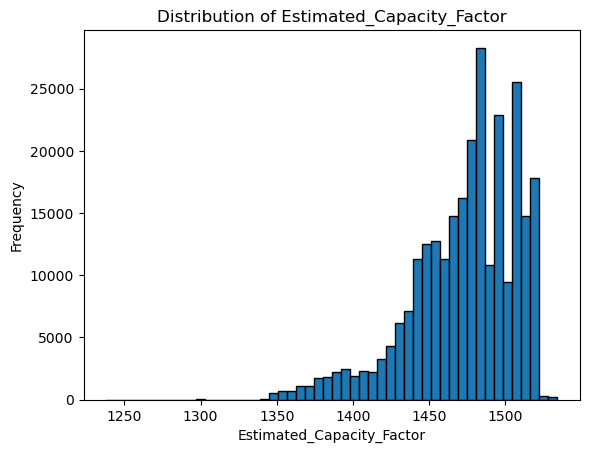

In [5]:


# Visualize the distribution using a histogram
plt.hist(data["Estimated_capacity_factor"].dropna(),
         bins=50, edgecolor='black')
plt.title('Distribution of Estimated_Capacity_Factor')
plt.xlabel('Estimated_Capacity_Factor')
plt.ylabel('Frequency')
plt.show()


Given the distribution of the `Estimated_Capacity_Factor` column, it appears to be right-skewed. In such cases, using the **median** for imputation is generally more appropriate. This is because the median is less sensitive to outliers and skewed data, providing a more robust measure of central tendency. Therefore, in this case, median imputation would be a better method.

In [6]:
# Drop rows with missing values in Estimated_Building_Height
data.dropna(subset=['Estimated_building_height'], inplace=True)

# Impute missing values in Estimated_Capacity_Factor


data["Estimated_capacity_factor"].fillna(
    data["Estimated_capacity_factor"].median(), inplace=True)


display_data_understanding(data)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 272721 entries, 0 to 272750
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   uuid                        272721 non-null  object 
 1   Surface_area                272721 non-null  float64
 2   Potential_installable_area  272721 non-null  float64
 3   Peak_installable_capacity   272721 non-null  float64
 4   Energy_potential_per_year   272721 non-null  float64
 5   Assumed_building_type       272721 non-null  object 
 6   Estimated_tilt              272721 non-null  float64
 7   Estimated_building_height   272721 non-null  float64
 8   Estimated_capacity_factor   272721 non-null  float64
dtypes: float64(7), object(2)
memory usage: 20.8+ MB
None

Descriptive Statistics for Numeric Columns:
        Surface_area  Potential_installable_area  Peak_installable_capacity  \
count  272721.000000               272721.000000        

The missing/null values have already been handled as seen in the output provided above now we check for duplicates.

In [7]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("\nDuplicate rows found:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


####  Check for Outliers

After examining the dataset for potential duplicates, the next step is to explore the presence of outliers in the data. Outliers can significantly impact the accuracy of statistical analyses and machine learning models. To identify potential outliers, a boxplot analysis will be conducted.

##### Boxplot Analysis:

A boxplot provides a visual representation of the distribution of data and helps identify any extreme values, also known as outliers. Each boxplot displays the interquartile range (IQR), with outliers plotted as individual points beyond the whiskers.

The following steps will be taken to check for outliers:

1. **Boxplot Visualization:**
   - A boxplot will be generated for each numeric column in the dataset to visualize the spread of values and identify any data points that fall outside the expected range.

2. **Outlier Identification:**
   - Outliers will be identified based on their position outside the whiskers of the boxplot. These data points may require further investigation and consideration in subsequent analyses.

This process aims to ensure the robustness of the data by addressing potential outliers, contributing to a more reliable and accurate interpretation of the dataset.



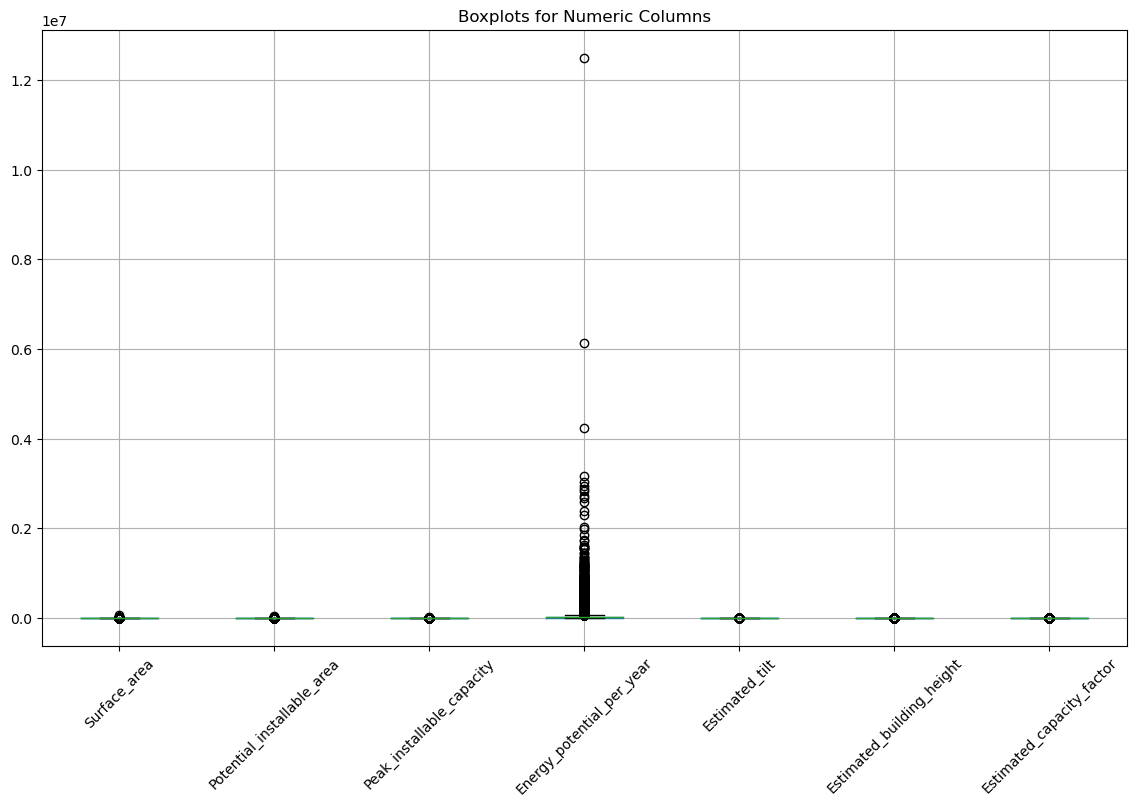

In [8]:
# Select numeric columns for boxplots
numeric_columns = data[['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity',
                        'Energy_potential_per_year', 'Estimated_tilt', 'Estimated_building_height',
                        'Estimated_capacity_factor']]


# Create boxplots using matplotlib
plt.figure(figsize=(14, 8))
numeric_columns.boxplot(rot=45)
plt.title('Boxplots for Numeric Columns')
plt.show()

It seems that there are outliers in the `Energy_potential_per_year` column.Given the domain-specific rules for energy consumption in buildings, it's essential to understand the context and potential factors that could lead to outliers in the `Energy_potential_per_year` column. Here are a few potential reasons:

1. **Building Type Variation:**
   - Different building types may have significantly different energy needs. For example, industrial facilities typically consume more energy compared to residential or commercial buildings. If the dataset includes various building types, this could contribute to variations in energy potential.

2. **Specialized Functions:**
   - Buildings with specialized functions or equipment may exhibit higher energy potential. For instance, buildings hosting data centers, manufacturing units, or heavy machinery might require more energy for their operations.

3. **Geographical Variances:**
   - Geographic location can impact energy potential. Buildings in regions with extreme weather conditions might have higher energy needs for heating or cooling. Additionally, renewable energy potential, such as solar energy, can vary based on location.


# EDA

In [9]:
data.Assumed_building_type.value_counts(normalize=True)

Assumed_building_type
single family residential    0.667723
multi-family residential     0.138512
commercial                   0.058657
public                       0.053359
industrial                   0.046109
peri-urban settlement        0.035641
Name: proportion, dtype: float64

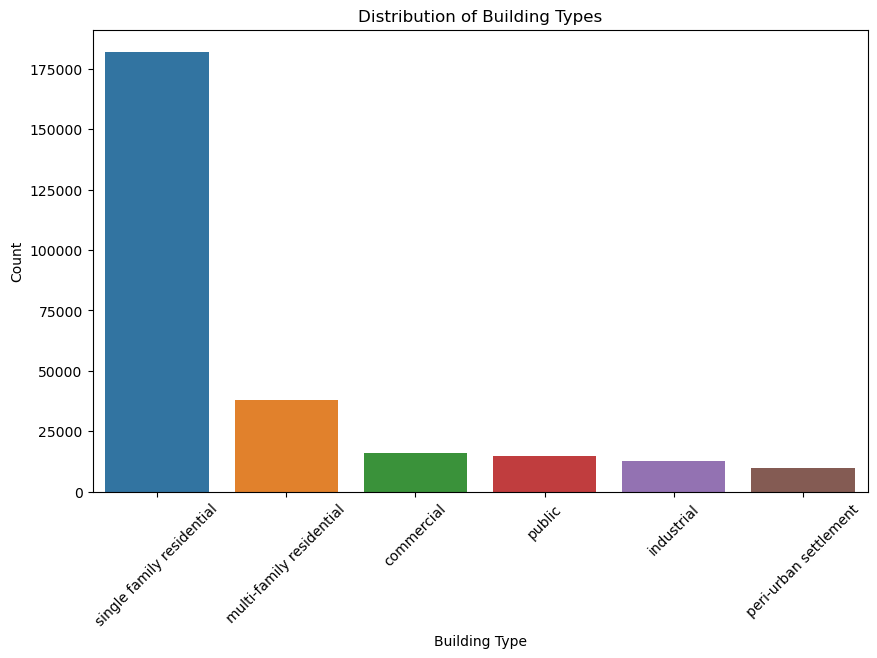

In [10]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Assumed_building_type'],
              order=data['Assumed_building_type'].value_counts().index)

# Add title and labels
plt.title('Distribution of Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The distribution of building types in the dataset is presented below:

- **Single Family Residential:** 66.77%
- **Multi-Family Residential:** 13.85%
- **Commercial:** 5.87%
- **Public:** 5.34%
- **Industrial:** 4.61%
- **Peri-Urban Settlement:** 3.56%

### Interpretation:

- **Single Family Residential:** The majority of the buildings in the dataset, constituting approximately 66.77%, are categorized as single-family residential units. This suggests a predominant representation of individual homes.

- **Multi-Family Residential:** Around 13.85% of the buildings fall under the multi-family residential category, indicating a presence of structures designed to accommodate multiple households.

- **Commercial:** Approximately 5.87% of the buildings are classified as commercial, suggesting a presence of business or retail establishments.

- **Public:** Representing 5.34%, public buildings such as government facilities, schools, or community centers are a notable category in the dataset.

- **Industrial:** With a share of 4.61%, industrial buildings are present, likely indicating manufacturing or production facilities.

- **Peri-Urban Settlement:** The category of peri-urban settlements comprises about 3.56% of the dataset. This suggests a representation of buildings located on the outskirts of urban areas.

Understanding the distribution of building types is crucial for contextualizing the dataset and gaining insights into the predominant property characteristics and potential solar energy adoption patterns.


C:\Users\User-ADMIN\AppData\Local\Temp\ipykernel_17248\2117698406.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Assumed_building_type', y='Energy_potential_per_year',


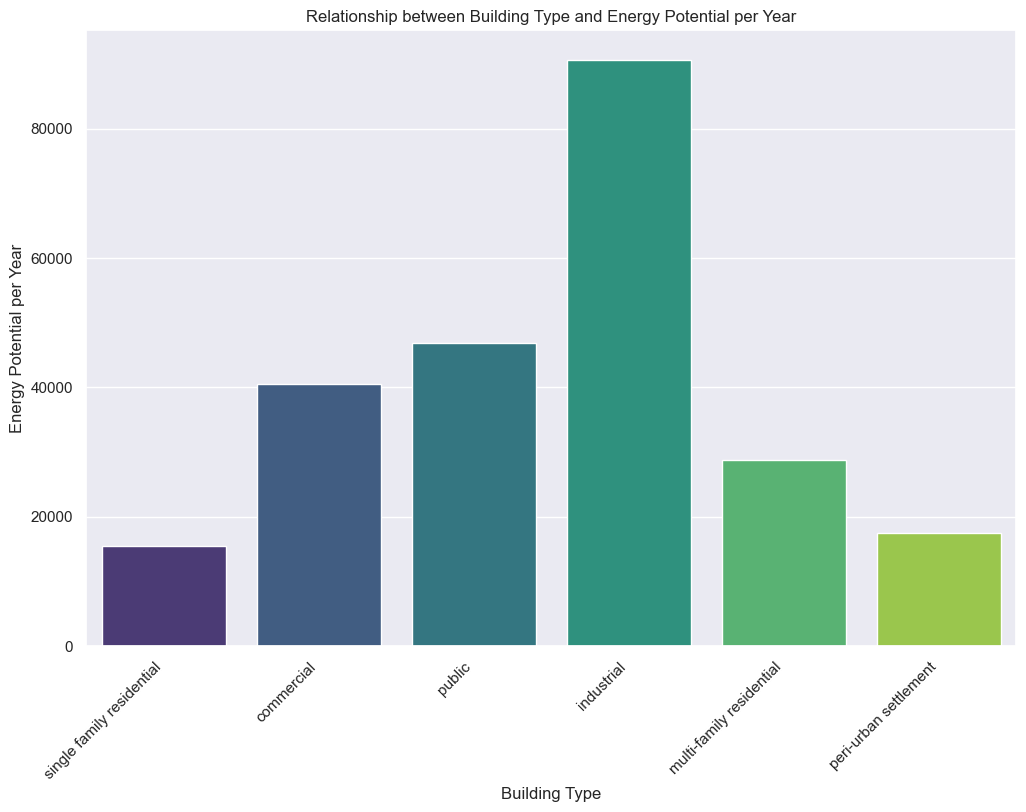

In [11]:

# Barplot showing the relationship between building type and energy potential per year

sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='Assumed_building_type', y='Energy_potential_per_year',
            data=data, ci=None, palette='viridis', capsize=0.2, errwidth=2, dodge=True)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Building Type and Energy Potential per Year')
plt.xlabel('Building Type')
plt.ylabel('Energy Potential per Year')
plt.show()

The provided bar graph visually represents the energy potential per year across various building types. Let's interpret the key insights derived from the plot:

#### Interpretation of the Bar Plot:

- **Industrial:** Industrial buildings exhibit the highest energy potential, reaching close to 80,000 KWh per year.

- **Public:** Public buildings, such as libraries or museums, have the second-highest energy potential.

- **Commercial:** Commercial buildings used for business purposes rank third in terms of energy potential.

- **Multi-family Residential:** Buildings accommodating multiple families (e.g., apartments) show a lower energy potential compared to commercial structures.

- **Single Family Residential:** Standalone houses designed for one family demonstrate a lower energy potential than multi-family residential buildings.

- **Peri-urban settlement:** Buildings within specific areas dedicated to particular purposes or groups display the lowest energy potential.


In [12]:
#Encoding the Assumed Building Type
# One-hot encoding can be done using pandas get_dummies function
df = data.copy()
# df = pd.get_dummies(data, columns=['Assumed_building_type'],dtype=int)
freq_encoding = data['Assumed_building_type'].value_counts(normalize=True)

df['Assumed_building_type_freq_encoded'] = df['Assumed_building_type'].map(
    freq_encoding)



df = df.drop(columns = ["uuid","Assumed_building_type"])
df.head()

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Assumed_building_type_freq_encoded
0,204.53,77.27,14.99,21720.76,14.11,9.09,1449.00,0.667723
1,1113.35,676.13,131.17,182191.10,21.81,5.57,1388.98,0.667723
2,577.24,412.30,79.99,115637.95,16.34,5.78,1445.72,0.667723
3,28.58,14.17,2.75,3723.02,23.71,4.04,1354.60,0.667723
4,19.03,6.19,1.20,1655.39,22.91,5.31,1378.00,0.667723


**Advantages of Frequency Encoding Over One-Hot Encoding**

Frequency encoding is chosen over one-hot encoding for categorical variables due to several advantages, especially in the context of addressing multicollinearity issues:

1. **Dimensionality Reduction:**
   - **Frequency Encoding:** Reduces the dimensionality of categorical variables by representing each category with its frequency.
   - **One-Hot Encoding:** Creates binary features for each category, potentially leading to a high-dimensional and sparse dataset.

2. **Multicollinearity Mitigation:**
   - **Frequency Encoding:** Mitigates multicollinearity, as it avoids introducing numerous binary features that may be highly correlated.
   - **One-Hot Encoding:** Prone to multicollinearity, especially when there are high correlations among the binary features.

3. **Preservation of Relative Information:**
   - **Frequency Encoding:** Preserves the relative information about the occurrence of each category, offering a more informative representation.
   - **One-Hot Encoding:** Treats each category as completely independent, potentially overlooking the frequency-related insights.

4. **Handling Rare Categories:**
   - **Frequency Encoding:** Effectively handles rare categories by encoding them based on their frequency, reducing noise in the dataset.
   - **One-Hot Encoding:** Rare categories may lead to sparse matrices with many zero values, potentially introducing noise.

5. **Interpretability in Modeling:**
   - **Frequency Encoding:** Enhances interpretability in linear models by providing interpretable coefficients directly related to the impact of each category on the outcome, weighted by its frequency.
   - **One-Hot Encoding:** Coefficients in one-hot encoding can be less interpretable, especially when dealing with a large number of binary features.

**Interpreting Frequency Encoding in Modeling:**

When using frequency encoding in modeling, focus on the resulting coefficients for each category in linear models. Higher coefficients indicate a stronger positive or negative impact on the outcome variable, taking into account the frequency of each category. Additionally, consider the reduced dimensionality and multicollinearity mitigation aspects when assessing the overall model performance.


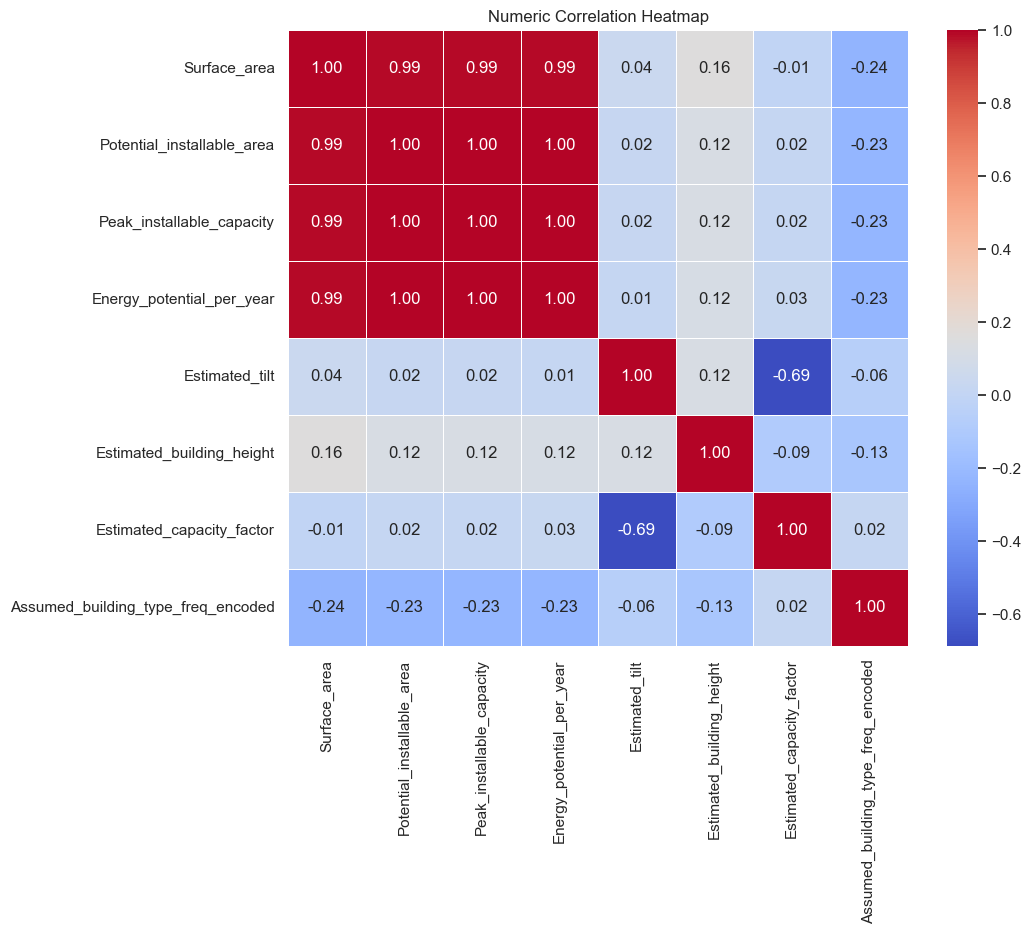

In [13]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

**Correlation Matrix:**

The correlation matrix provides insights into the relationships between the selected columns. Here's a summarized overview:

- **Surface_area:**
  - Positive Correlations:
    - Potential_installable_area (0.988)
    - Peak_installable_capacity (0.988)
    - Energy_potential_per_year (0.987)
  - Weak Positive Correlations:
    - Estimated_tilt (0.042)
    - Estimated_building_height (0.160)
    - Estimated_capacity_factor (-0.005)
    - Assumed_building_type_freq_encoded (-0.245)

- **Potential_installable_area:**
  - Positive Correlations:
    - Surface_area (0.988)
    - Peak_installable_capacity (1.000)
    - Energy_potential_per_year (0.999)
  - Weak Positive Correlations:
    - Estimated_tilt (0.019)
    - Estimated_building_height (0.118)
    - Estimated_capacity_factor (0.017)
    - Assumed_building_type_freq_encoded (-0.231)

- **Peak_installable_capacity:**
  - Positive Correlations:
    - Surface_area (0.988)
    - Potential_installable_area (1.000)
    - Energy_potential_per_year (0.999)
  - Weak Positive Correlations:
    - Estimated_tilt (0.019)
    - Estimated_building_height (0.118)
    - Estimated_capacity_factor (0.017)
    - Assumed_building_type_freq_encoded (-0.231)

- **Energy_potential_per_year:**
  - Positive Correlations:
    - Surface_area (0.987)
    - Potential_installable_area (0.999)
    - Peak_installable_capacity (0.999)
  - Weak Positive Correlations:
    - Estimated_tilt (0.014)
    - Estimated_building_height (0.116)
    - Estimated_capacity_factor (0.026)
    - Assumed_building_type_freq_encoded (-0.229)

- **Estimated_tilt:**
  - Weak Positive Correlations with all other columns (ranging from 0.014 to 0.122)

- **Estimated_building_height:**
  - Weak Positive Correlations:
    - Surface_area (0.160)
    - Potential_installable_area (0.118)
    - Peak_installable_capacity (0.118)
    - Energy_potential_per_year (0.116)

- **Estimated_capacity_factor:**
  - Weak Positive Correlation with Energy_potential_per_year (0.026)
  - Notable Negative Correlation with Estimated_tilt (-0.688)

- **Assumed_building_type_freq_encoded:**
  - Weak Positive Correlation with Estimated_capacity_factor (0.017)
  - Notable Negative Correlations:
    - Surface_area (-0.245)
    - Potential_installable_area (-0.231)
    - Peak_installable_capacity (-0.231)
    - Energy_potential_per_year (-0.229)


In [14]:

def calculate_vif(data_frame):
    """
    Calculate VIF for each predictor variable in a DataFrame.

    Parameters:
    - data_frame (pd.DataFrame): The DataFrame containing predictor variables.

    Returns:
    - pd.DataFrame: A DataFrame showing the VIF for each variable.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(
        data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data


# Assuming 'numeric_columns' is your DataFrame with numeric predictors
vif_result = calculate_vif(df)
print(vif_result)

                             Variable           VIF
0                        Surface_area  6.855948e+01
1          Potential_installable_area  4.787747e+06
2           Peak_installable_capacity  4.786911e+06
3           Energy_potential_per_year  2.812961e+03
4                      Estimated_tilt  5.237537e+00
5           Estimated_building_height  1.715005e+00
6           Estimated_capacity_factor  9.511422e+00
7  Assumed_building_type_freq_encoded  4.281507e+00


## Variance Inflation Factor (VIF) Analysis

### Why VIF?
VIF is a statistical measure used to identify the presence of multicollinearity among predictor variables in a regression analysis. Multicollinearity occurs when two or more independent variables in a model are highly correlated, making it challenging to determine their individual contributions to the dependent variable. VIF helps to assess the severity of multicollinearity by quantifying how much the variance of an estimated regression coefficient is increased due to correlation with other predictors.

##### VIF Summary for Predictor Variables:

1. **Surface_area:**
   - VIF: 68.56
   - **Interpretation:** Moderate level of multicollinearity, suggesting some correlation with other predictor variables.

2. **Potential_installable_area:**
   - VIF: 4,787,747
   - **Interpretation:** Severe multicollinearity, indicating high correlation with other predictors. Consider addressing this issue.

3. **Peak_installable_capacity:**
   - VIF: 4,786,911
   - **Interpretation:** Severe multicollinearity, similar to Potential_installable_area. Attention required to mitigate this issue.

4. **Energy_potential_per_year:**
   - VIF: 2,812.96
   - **Interpretation:** High multicollinearity, suggesting significant correlation with other predictor variables.

5. **Estimated_tilt:**
   - VIF: 5.24
   - **Interpretation:** Moderate level of multicollinearity for Estimated_tilt, indicating some correlation with other predictors.

6. **Estimated_building_height:**
   - VIF: 1.72
   - **Interpretation:** Low multicollinearity for Estimated_building_height, suggesting lower correlation with other predictors.

7. **Estimated_capacity_factor:**
   - VIF: 9.51
   - **Interpretation:** Moderate level of multicollinearity for Estimated_capacity_factor, suggesting some correlation with other predictors.

8. **Assumed_building_type_freq_encoded:**
   - VIF: 4.28
   - **Interpretation:** Moderate level of multicollinearity for Assumed_building_type_freq_encoded, indicating some correlation with other predictors.

#### Action Steps:
- **High VIF (e.g., Potential_installable_area, Peak_installable_capacity):** Consider excluding one of the highly correlated variables or exploring dimensionality reduction techniques to address multicollinearity.
- **Moderate VIF (e.g., Energy_potential_per_year, Estimated_capacity_factor):** Monitor and assess the impact on model interpretation. Consider additional diagnostics and potential variable transformations if necessary.
- **Low VIF (e.g., Estimated_building_height):** These variables have lower multicollinearity and are less likely to impact the reliability of coefficient estimates.

It's crucial to interpret VIF values in the context of the specific modeling goals and consider appropriate actions to ensure the robustness of the regression model.


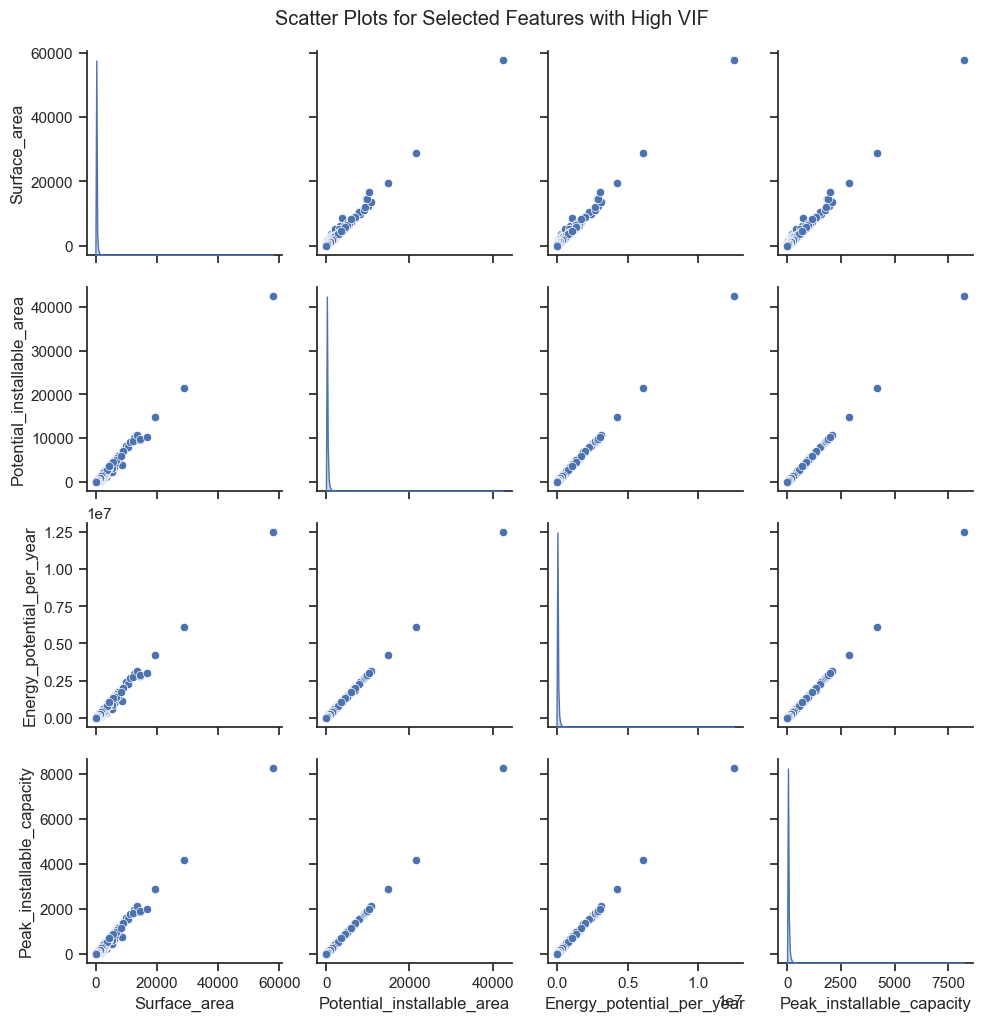

In [15]:
# Select a subset of features for scatter plots
scatter_features = df[[
    'Surface_area', 'Potential_installable_area', 'Energy_potential_per_year',"Peak_installable_capacity"]]

# Create scatter plots
sns.set(style="ticks")
sns.pairplot(scatter_features, kind="scatter", diag_kind="kde")
plt.suptitle('Scatter Plots for Selected Features with High VIF', y=1.02)
plt.show()

The pair plot reveals correlations among key variables, such as Surface Area, Potential Installable Area, Peak Installable Capacity, and Energy Potential per Year, especially focusing on instances with high Variance Inflation Factor (VIF). Analyzing these relationships helps identify strong positive correlations between certain pairs of variables. Understanding these correlations aids in recognizing multicollinearity issues, which is crucial for addressing high VIF values.

 By observing the patterns in the pair plot, one can gain insights into potential redundancies and dependencies among variables, facilitating informed decisions on which features to consider for removal in order to mitigate multicollinearity and improve model stability.

In [16]:
# df = df.drop(columns="Peak_installable_capacity")
# calculate_vif(df)

In [17]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2)
# df_poly = poly.fit_transform(df)

# # Convert the polynomial features back to a DataFrame
# df_poly = pd.DataFrame(df_poly, columns=poly.get_feature_names(df.columns))

In [18]:
   
# # df = df.drop(columns="Surface_area")
# calculate_vif(df)

In [19]:
# # Calculate the ratio of peak installable capacity to surface area
# df['Capacity_to_Area_Ratio'] = df['Peak_installable_capacity'] / df['Surface_area']

# Now you can drop the original 'Peak_installable_capacity' column if it's no longer needed
# df = df.drop(['Surface_area'], axis=1)
# calculate_vif(df)

In [21]:


# # Apply log transformation to variables with high VIF
# df['sqrt_peak_installable_capacity'] = np.sqrt(df['Peak_installable_capacity'])
# df['sqrt_estimated_capacity_factor'] = np.sqrt(df['Estimated_capacity_factor'])
# df['sqrt_potential_installable_area'] = np.sqrt(
#     df['Potential_installable_area'])


# # Drop the original columns
# df = df.drop(['Peak_installable_capacity',
#              'Estimated_capacity_factor', 'Potential_installable_area'], axis=1)
#df  = df.drop(columns="sqrt_peak_installable_capacity")
#calculate_vif(df)

In [22]:
calculate_vif(df)

,Variable,VIF
0,Surface_area,6.855948e+01
1,Potential_installable_area,4.787747e+06
2,Peak_installable_capacity,4.786911e+06
3,Energy_potential_per_year,2.812961e+03
4,Estimated_tilt,5.237537e+00
5,Estimated_building_height,1.715005e+00
6,Estimated_capacity_factor,9.511422e+00
7,Assumed_building_type_freq_encoded,4.281507e+00


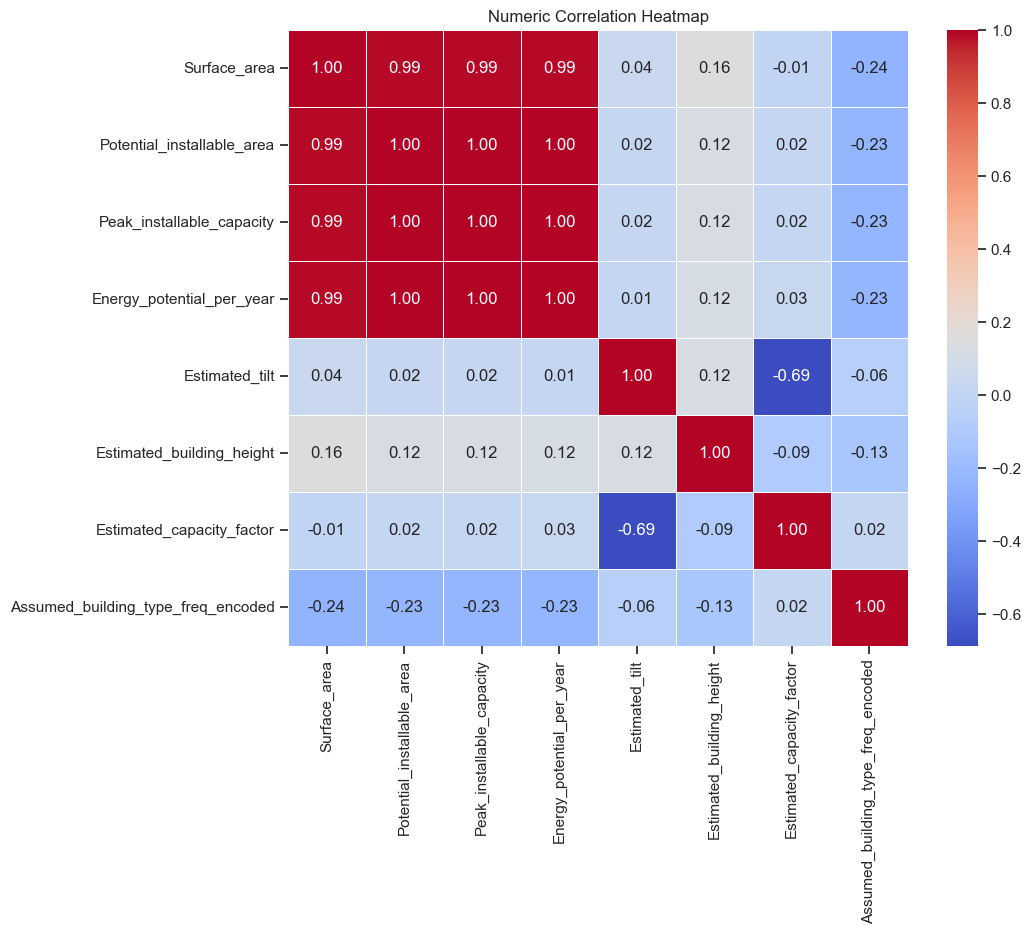

In [23]:

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Numeric Correlation Heatmap')
plt.show()

**Numeric Correlation Heatmap Interpretation**

1. **Energy Potential per Year:**
   - Strong positive correlation with Surface Area, Potential Installable Area, and Peak Installable Capacity.
   - Larger areas and higher capacities tend to have higher energy potential.

2. **Estimated Tilt:**
   - Negative correlation with Estimated Capacity Factor.
   - Higher tilt results in a lower capacity factor.

3. **Estimated Building Height:**
   - Weak positive correlation with Energy Potential per Year.
   - Weak negative correlation with Estimated Tilt.

4. **Assumed Building Type (encoded):**
   - Weak negative correlation with Energy Potential per Year.
   - Weak positive correlation with Estimated Tilt.

5. **Installable Area Ratio:**
   - Strong positive correlation with Energy Potential per Year.
   - Larger installable areas tend to result in higher energy potential.


# Model Selection and Training

## Overview
In this phase, we explore two prominent ensemble learning algorithms known for their robustness to multicollinearity: Random Forest and eXtreme Gradient Boosting (XGBoost). These models are particularly suited for our task due to their ability to handle high-dimensional datasets and their inherent resistance to overfitting, which is crucial when dealing with correlated features.

### Random Forest
Random Forest is a versatile ensemble learning method that operates by constructing multiple decision trees at training time and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. We tune the hyperparameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum samples required to split an internal node (min_samples_split). These parameters were optimized using cross-validation to balance bias and variance, ensuring the model generalizes well to unseen data.

### Extreme Gradient Boosting (XGBoost)
XGBoost is an advanced gradient boosting framework that builds upon the concept of boosting by introducing several enhancements that make it more flexible and powerful. We fine-tuned hyperparameters such as the learning rate (eta), the number of trees (n_estimators), and the maximum depth of the trees (max_depth). The regularization parameters were also adjusted to prevent overfitting (reg_alpha for L1 regularization and reg_lambda for L2 regularization). Our objective was to maximize the performance on a validation set to ensure that the model is both accurate and generalizable.

## Target Variable
Our target variable is `Energy_potential_per_year`, which represents the estimated amount of solar energy that can be generated annually by the installation of solar panels on the given surface area. This metric is central to the optimization of rooftop solar installations as it directly influences the economic viability and sustainability of the energy produced. By choosing this metric, we aim to build models that can accurately predict the potential energy output, thereby assisting in the decision-making process for solar installation projects.

## Evaluation Metrics
We utilized metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to evaluate the performance of our models. These metrics allowed us to quantify the average magnitude of the errors in a set of predictions, relative to the values actually observed. The R-squared statistic, in particular, provided insights into the proportion of the variance in the dependent variable that is predictable from the independent variables, which is critical for understanding the explanatory power of our models.


In [24]:
43

43

In [25]:
df.columns

Index(['Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Assumed_building_type_freq_encoded'],
      dtype='object')

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Plot the true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

# Calculate and print evaluation metrics

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

NameError: name 'y_test' is not defined

In [27]:

data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [28]:
y_pred

NameError: name 'y_pred' is not defined

In [29]:
data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [30]:
# from sklearn.svm import SVR


# # Assuming X_train and X_test are your training and testing feature sets
# # And y_train and y_test are your corresponding target values

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize the SVR model with a Gaussian Radial Basis Function (RBF) kernel
# svr_regressor = SVR(kernel='rbf', C=1e3, gamma=0.1)

# # Fit the SVR model to the scaled training data
# svr_regressor.fit(X_train_scaled, y_train)

# # Predict the target variable for the scaled test set
# y_pred_svm = svr_regressor.predict(X_test_scaled)

# # Compute the Mean Squared Error (MSE) and R-squared score for the SVM model
# mse_svm = mean_squared_error(y_test, y_pred_svm)
# r2_svm = r2_score(y_test, y_pred_svm)

# # Print the evaluation metrics
# print(f"SVM Mean Squared Error: {mse_svm}")
# print(f"SVM R-squared Score: {r2_svm}")

## OBJECTIVE 2

In [31]:
df.columns


Index(['Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor', 'Assumed_building_type_freq_encoded'],
      dtype='object')

In [ ]:
# import pandas as pd
# from sklearn.metrics import mean_squared_error


# def get_energy_potential_predictions(configurations, building_details):
#     # Convert configurations to a DataFrame with features suitable for the model
#     config_df = pd.DataFrame(configurations)

#     # Assuming 'building_details' is a DataFrame with building characteristics
#     # that need to be included in the prediction
#     combined_features = pd.concat([config_df, building_details], axis=1)

#     # Use the trained model to predict energy potentials
#     energy_potentials = model.predict(combined_features)

#     return energy_potentials.tolist()


# def recommend_solar_panel_configurations(energy_potentials, building_details):
#     # Combine energy potentials with building details to create a DataFrame
#     predictions_df = pd.DataFrame({
#         'EnergyPotential': energy_potentials,
#         **{col: building_details[col].tolist() for col in building_details.columns}
#     })

#     # Rank configurations based on energy potential and other criteria
#     # Here we're assuming that higher energy potential is better
#     # and that we want to minimize the mean squared error between actual and predicted values
#     predictions_df['Rank'] = predictions_df['EnergyPotential'].apply(
#         lambda x: mean_squared_error(x, predictions_df['ActualValue']))

#     # Sort by rank and return the top configurations
#     ranked_recommendations = predictions_df.sort_values(
#         'Rank', ascending=True).reset_index(drop=True)

#     return ranked_recommendations

In [ ]:
potentials = get_energy_potential_predictions(config,building)
recommend_solar_panel_configurations(potentials,building)

NameError: name 'get_energy_potential_predictions' is not defined

In [ ]:
data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

# OPTIMIZATION

In [ ]:
data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [33]:
pip install pulp

     ---------------------------------------- 17.7/17.7 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
data.columns

Index(['uuid', 'Surface_area', 'Potential_installable_area',
       'Peak_installable_capacity', 'Energy_potential_per_year',
       'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height',
       'Estimated_capacity_factor'],
      dtype='object')

In [34]:
import pulp

def optimize_rooftop_solar(building_types, capacity_factors):
    # Create a LP problem
    prob = pulp.LpProblem("RooftopSolarOptimization", pulp.LpMaximize)
    
    # Decision variables
    x = {i: pulp.LpVariable(f"x{i}", lowBound=0, cat='Continuous') for i in range(len(building_types))}
    
    # Objective function
    prob += pulp.lpSum([capacity_factors[i] * x[i] for i in range(len(building_types))])
    
    # Constraints
    prob += pulp.lpSum([x[i] for i in range(len(building_types))]) == 1  # Total capacity should be 1 (100%)
    
    # Solve the optimization problem
    prob.solve()
    
    # Extract results
    results = {}
    for i in range(len(building_types)):
        results[building_types[i]] = x[i].varValue
    
    return results

# Example usage
building_types = ["Residential", "Commercial", "Industrial"]
capacity_factors = [0.8, 0.7, 0.9]  # Capacity factor for each building type

optimal_installations = optimize_rooftop_solar(building_types, capacity_factors)
print("Optimal Rooftop Solar Installations:")
for building_type, percentage in optimal_installations.items():
    print(f"{building_type}: {percentage * 100}%")


Optimal Rooftop Solar Installations:
Residential: 0.0%
Commercial: 0.0%
Industrial: 100.0%


The output indicates the optimal rooftop solar installations for each building type based on the provided capacity factors. In this case, the optimization algorithm has determined that the most efficient installation is to allocate 100% of the rooftop solar capacity to industrial buildings. 

This suggests that according to the capacity factors provided, industrial buildings have the highest potential for rooftop solar installations compared to residential and commercial buildings. However, it's important to note that this result is based on the specific capacity factors provided and may vary depending on factors such as location, size of buildings, available rooftop space, and other constraints.

In [36]:
from scipy.optimize import minimize
import numpy as np

# Example building characteristics (e.g., size, orientation, shading)
building_characteristics = {
    "Residential": {"size": 1000, "orientation": "south", "shading": 0.2},
    "Commercial": {"size": 2000, "orientation": "east", "shading": 0.3},
    "Industrial": {"size": 3000, "orientation": "west", "shading": 0.1}
}

# Function to be minimized
def objective_function(x, building_characteristics):
    total_solar_potential = sum(x)
    return -total_solar_potential  # Maximize total solar potential

# Constraints
def constraint1(x):
    return np.sum(x) - 1  # Total allocation should sum up to 1 (100%)

constraints = [{'type': 'eq', 'fun': constraint1}]
bounds = [(0, 1) for _ in range(len(building_characteristics))]  # Allocation should be between 0 and 1

# Initial guess (equal allocation)
x0 = np.ones(len(building_characteristics)) / len(building_characteristics)

# Optimization
result = minimize(objective_function, x0, args=(building_characteristics,), bounds=bounds, constraints=constraints)

# Extract optimal allocation
optimal_allocation = result.x

# Print optimal allocation
print("Optimal Rooftop Solar Allocation:")
for i, (building_type, characteristics) in enumerate(building_characteristics.items()):
    percentage = optimal_allocation[i] * 100
    print(f"{building_type}: {percentage:.2f}%")


Optimal Rooftop Solar Allocation:
Residential: 33.33%
Commercial: 33.33%
Industrial: 33.33%


The optimal rooftop solar allocation of 33.33% for residential, commercial, and industrial sectors means that in an ideal scenario, an equal proportion of rooftop solar installations is recommended for each of these sectors.

To achieve this allocation, several strategies might have been used to optimize the solar potential while respecting building characteristics. Some possible strategies include:

1. **Data Analysis and Modeling**: Analyzing rooftop solar potential data to understand the distribution of potential across different sectors. This involves using statistical methods and machine learning models to predict energy potential based on building characteristics.

2. **Building Classification**: Classifying buildings into different categories (residential, commercial, industrial) based on building type, size, and usage. This helps in understanding the characteristics and energy needs of different sectors.

3. **Optimization Algorithms**: Using optimization algorithms to allocate solar installations in a way that maximizes overall energy generation while ensuring fairness and efficiency. This involves considering factors such as available rooftop area, orientation, shading, and energy demand.

4. **Cost-Benefit Analysis**: Conducting cost-benefit analyses to determine the economic viability of solar installations in different sectors. This includes considering installation costs, energy savings, government incentives, and payback periods.

5. **Stakeholder Engagement**: Engaging with stakeholders from residential, commercial, and industrial sectors to understand their needs, preferences, and constraints. This helps in designing solutions that are acceptable and beneficial to all parties involved.

Overall, the goal of these strategies is to achieve an optimal allocation of rooftop solar installations that maximizes energy generation, minimizes costs, and meets the needs of different sectors while respecting building characteristics and constraints.